<a href="https://colab.research.google.com/github/mollah2022/Neural-Network/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# ২D ডেটাসেট তৈরি
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# ট্রেন-টেস্ট ভাগ করা
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ফিচার স্কেলিং করা
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
def build_model(activation):
    model = keras.Sequential([
        layers.Dense(1, activation=activation, input_shape=(2,))
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
def plot_decision_boundary(model, X, y, title):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid)
    preds = (preds > 0.5).astype(int).reshape(xx.shape)
    plt.contourf(xx, yy, preds, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


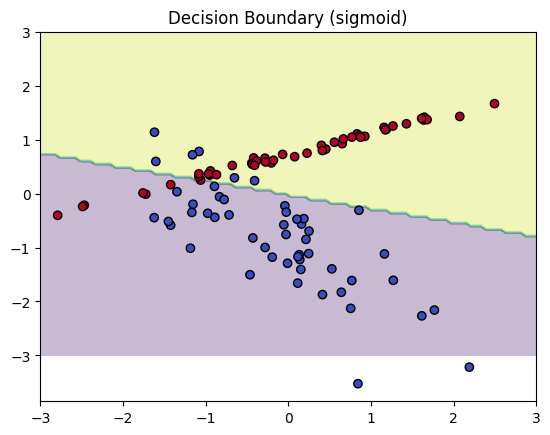

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


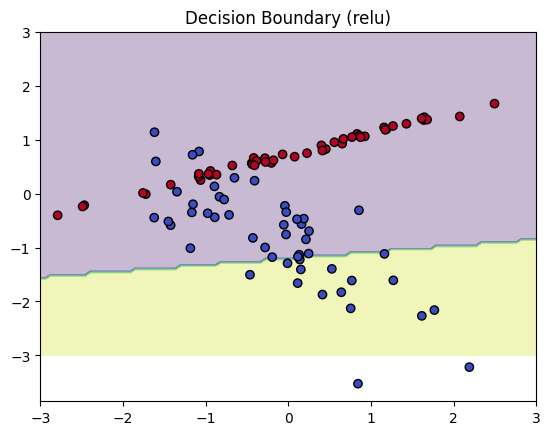

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


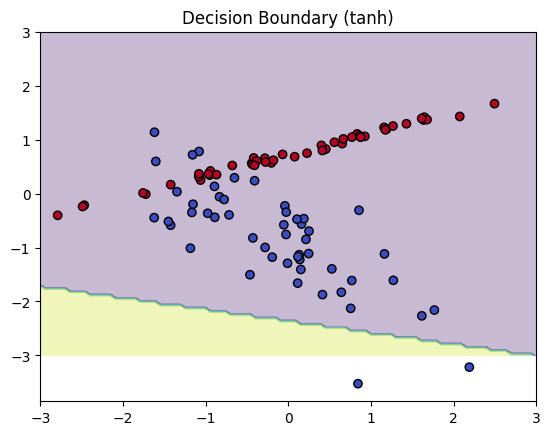

In [ ]:
activations = ['sigmoid', 'relu', 'tanh']
for activation in activations:
    model = build_model(activation)
    model.fit(X_train, y_train, epochs=50, verbose=0)
    plot_decision_boundary(model, X_test, y_test, f"Decision Boundary ({activation})")
